# Lab 4 - Linear models
We focus on models in the form



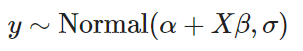

In [271]:
from cmdstanpy import CmdStanModel
import seaborn as sns

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors

We will try to fit $Normal(\mu, \sigma)$
 distribution to height data. Special case of linear model with $\beta = 0$
.



In [272]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


## Task 1. Prior predictive checks

In [273]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


1. Plot histograms of mu, sigma and simulated height.

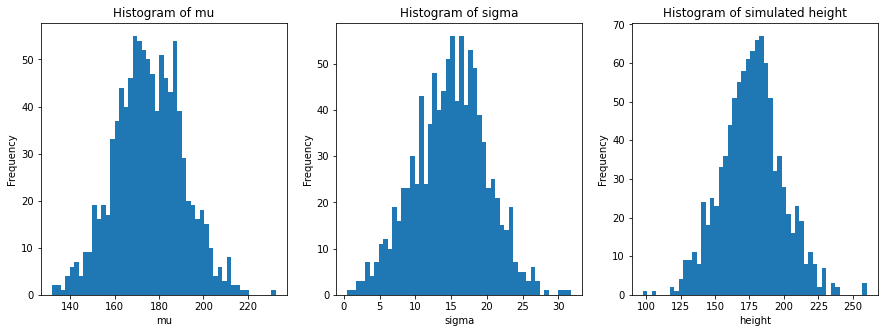

In [274]:
sim_pd = sim.draws_pd()
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].hist(sim_pd['mu'], bins=50)
ax[0].set_xlabel('mu')
ax[0].set_ylabel('Frequency')
ax[0].set_title("Histogram of mu")


ax[1].hist(sim_pd['sigma'], bins=50)
ax[1].set_xlabel('sigma')
ax[1].set_ylabel('Frequency')
ax[1].set_title("Histogram of sigma")

ax[2].hist(sim_pd['height_sim'], bins=50)
ax[2].set_xlabel('height')
ax[2].set_ylabel('Frequency')
ax[2].set_title("Histogram of simulated height")
plt.show()

2. Plot a joint distribution of mu and sigma.

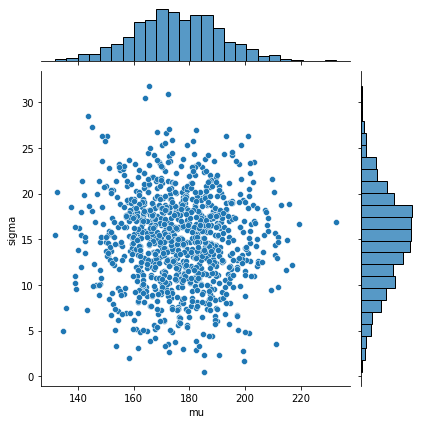

In [275]:
sns.jointplot(x = sim_pd['mu'], y = sim_pd['sigma'])
plt.show()

3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out.
5. Check if observed data is possible to obtain using priors.

## Task 2. Model fit and evaluation

In [276]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [277]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


1. Plot a joint distribution of fitted mu and sigma.

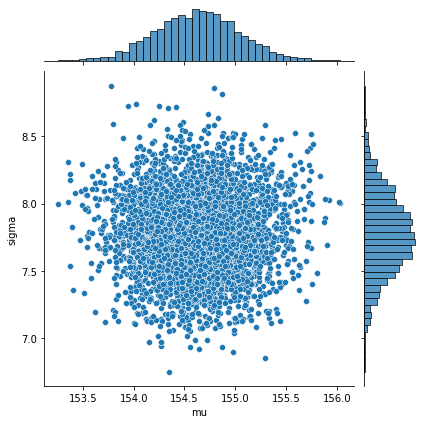

In [278]:
fit_pd = fit.draws_pd()

sns.jointplot(x = fit_pd['mu'], y = fit_pd['sigma'])
plt.show()

2. Plot histograms of data and simulated heights and evaluate the quality of model.

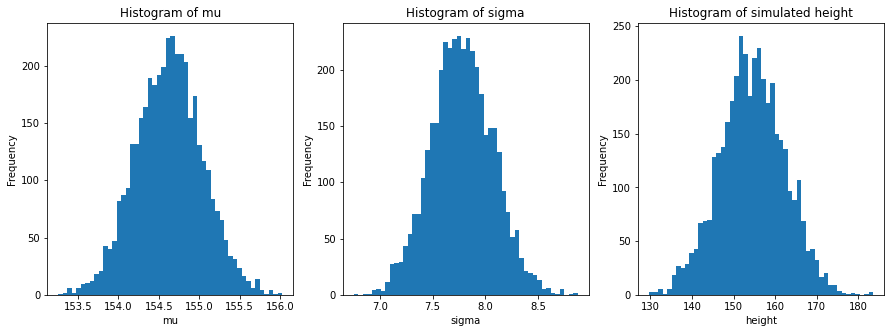

In [279]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].hist(fit_pd['mu'], bins=50)
ax[0].set_xlabel('mu')
ax[0].set_ylabel('Frequency')
ax[0].set_title("Histogram of mu")


ax[1].hist(fit_pd['sigma'], bins=50)
ax[1].set_xlabel('sigma')
ax[1].set_ylabel('Frequency')
ax[1].set_title("Histogram of sigma")

ax[2].hist(fit_pd['height_sample'], bins=50)
ax[2].set_xlabel('height')
ax[2].set_ylabel('Frequency')
ax[2].set_title("Histogram of simulated height")
plt.show()

## Task 3. Adding predictor to the model - weight

Create column c_weight in the dataframe containing weights substrated by their mean.

In [280]:
data_sim={'N':50, 'weight':np.linspace(d.weight.min()/d.weight.mean(),d.weight.max()/d.weight.mean())}
data_sim

{'N': 50,
 'weight': array([0.69061384, 0.70509379, 0.71957374, 0.73405369, 0.74853364,
        0.76301359, 0.77749354, 0.79197348, 0.80645343, 0.82093338,
        0.83541333, 0.84989328, 0.86437323, 0.87885318, 0.89333313,
        0.90781308, 0.92229303, 0.93677297, 0.95125292, 0.96573287,
        0.98021282, 0.99469277, 1.00917272, 1.02365267, 1.03813262,
        1.05261257, 1.06709252, 1.08157247, 1.09605241, 1.11053236,
        1.12501231, 1.13949226, 1.15397221, 1.16845216, 1.18293211,
        1.19741206, 1.21189201, 1.22637196, 1.24085191, 1.25533185,
        1.2698118 , 1.28429175, 1.2987717 , 1.31325165, 1.3277316 ,
        1.34221155, 1.3566915 , 1.37117145, 1.3856514 , 1.40013134])}


## Task 4. Prior predictive checks

In [281]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /root/PCH_lab2/PCH_lab4/height_2a_ppc.stan to exe file /root/PCH_lab2/PCH_lab4/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /root/PCH_lab2/PCH_lab4/height_2a_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/PCH_lab2/PCH_lab4/height_2a_ppc.hpp /root/PCH_lab2/PCH_lab4/height_2a_ppc.stan
Warning in '/root/PCH_lab2/PCH_lab4/height_2a_ppc.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/root/PCH_lab2/PCH_lab4/height_2a_ppc.stan', line 9, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- 


INFO:cmdstanpy:CmdStan done processing.


Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

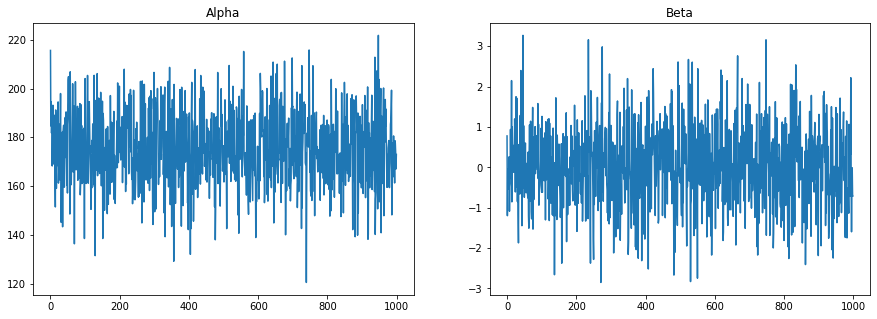

Maximum alpha value is:  221.805


In [282]:
sim_pd = sim.draws_pd()

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(sim_pd['alpha'])
ax[0].set_title('Alpha')
ax[1].plot(sim_pd['beta_var'])
ax[1].set_title('Beta')
plt.show()
print("Maximum alpha value is: ", max(sim_pd['alpha']))

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.

In [283]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [284]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [285]:
sim_pd = sim.draws_pd()
sim_pd.head()

,lp__,accept_stat__,alpha,beta_var,height_sample[1],height_sample[2],height_sample[3],height_sample[4],height_sample[5],height_sample[6],...,height_sample[41],height_sample[42],height_sample[43],height_sample[44],height_sample[45],height_sample[46],height_sample[47],height_sample[48],height_sample[49],height_sample[50]
0,0.0,0.0,215.623,2.175330,198.041,219.070,196.347,220.912,235.232,251.262,...,234.021,235.858,246.691,241.571,222.409,197.804,210.496,214.523,230.093,222.948
1,0.0,0.0,184.655,0.301518,184.761,184.812,203.094,196.269,195.976,202.557,...,180.665,195.275,225.142,184.684,171.553,182.707,170.774,192.801,169.454,183.580
2,0.0,0.0,194.566,0.926916,188.802,178.140,176.905,216.494,192.437,192.869,...,186.581,194.837,198.357,222.015,175.915,218.510,200.866,225.211,195.999,210.789
3,0.0,0.0,181.735,0.960919,185.601,167.681,178.610,174.822,202.390,172.572,...,171.428,196.332,187.285,195.951,191.390,185.348,188.916,204.577,176.471,175.891
4,0.0,0.0,188.390,0.619496,194.903,183.481,173.934,213.910,178.313,149.708,...,198.884,178.316,178.752,173.528,206.856,212.803,208.894,178.278,191.926,187.195


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

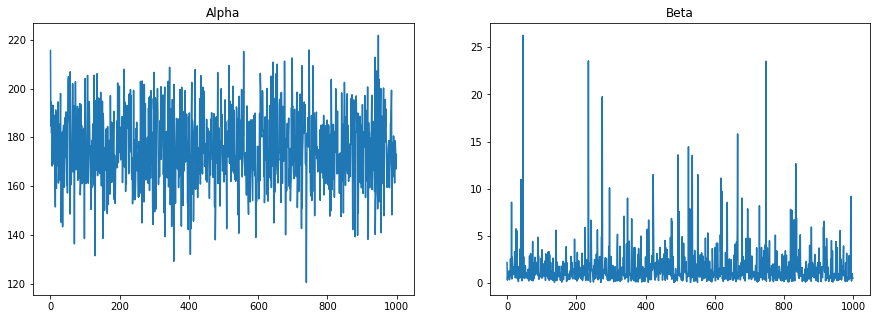

Maximum alpha value is:  221.805


In [286]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(sim_pd['alpha'])
ax[0].set_title('Alpha')
ax[1].plot(sim_pd['beta_var'])
ax[1].set_title('Beta')
plt.show()
print("Maximum alpha value is: ", max(sim_pd['alpha']))

Predicted alpha values are consistent with minimum and maximum height (271 cm).

2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

In [287]:
parameters = []
for i in range(1,50):
    sample_parameters = []
    height_sample = 'height_sample['+ str(i)+']'
    data = sim_pd[height_sample]
    sample_parameters.append(max(data))
    sample_parameters.append(min(data))
    sample_parameters.append(data.quantile(0.05))
    sample_parameters.append(data.quantile(0.25))
    sample_parameters.append(data.quantile(0.5))
    sample_parameters.append(data.quantile(0.75))
    sample_parameters.append(data.quantile(0.95))
    parameters.append(sample_parameters)

KeyboardInterrupt: 

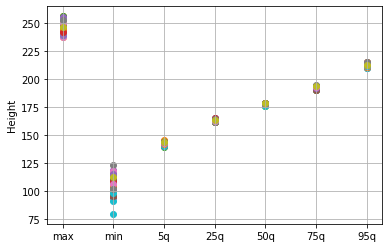

In [ ]:
x = ['max', 'min', '5q', '25q', '50q', '75q', '95q']
for obj in parameters:
    plt.scatter(x,obj)
plt.ylabel("Height")
plt.grid()

## Task 6. Fitting and evaluating model

In [ ]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:compiling stan file /root/PCH_lab2/PCH_lab4/height_2_fit.stan to exe file /root/PCH_lab2/PCH_lab4/height_2_fit
INFO:cmdstanpy:compiled model executable: /root/PCH_lab2/PCH_lab4/height_2_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/root/PCH_lab2/PCH_lab4/height_2_fit.hpp /root/PCH_lab2/PCH_lab4/height_2_fit.stan
Warning in '/root/PCH_lab2/PCH_lab4/height_2_fit.stan', line 41, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/root/PCH_lab2/PCH_lab4/height_2_fit.stan', line 52, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compi

1. Create data_fit dictionary containing data from N first rows of dataframe

In [290]:
data_fit = {'N':50, 'weight' :d.weight.values[:50]}

In [291]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [292]:
fit_pd = fit.draws_pd()
fit_pd.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,alpha,...,mu_vect[42],mu_vect[43],mu_vect[44],mu_vect[45],mu_vect[46],mu_vect[47],mu_vect[48],mu_vect[49],mu_vect[50],height_sample
0,1.373850,1.000000,0.571815,2.0,3.0,0.0,7.942980,166.656,11.21220,181.562,...,119.001,131.683,134.346,127.220,123.571,132.560,130.290,125.811,130.714,120.644
1,0.745595,0.947335,0.571815,3.0,7.0,0.0,0.428651,187.481,12.09760,174.748,...,96.991,112.753,116.063,107.206,102.671,113.844,111.023,105.455,111.549,116.103
2,0.704688,0.562383,0.571815,3.0,7.0,0.0,3.348080,171.517,4.80315,165.100,...,182.871,179.269,178.512,180.536,181.573,179.019,179.664,180.936,179.544,181.784
3,1.821950,0.972703,0.571815,3.0,7.0,0.0,0.358341,178.364,10.93530,186.551,...,149.539,157.041,158.617,154.401,152.243,157.561,156.218,153.568,156.468,153.694
4,1.841380,0.953398,0.571815,3.0,7.0,0.0,-0.395443,173.736,14.50170,167.821,...,213.594,204.315,202.366,207.580,210.250,203.673,205.334,208.611,205.024,208.742


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)

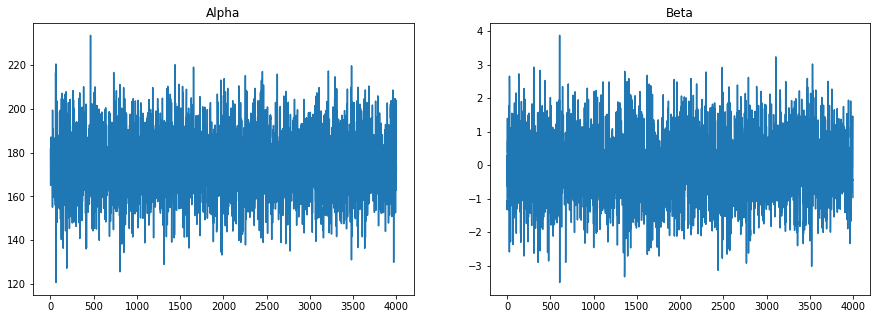

Maximum alpha value is:  233.606


In [293]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(fit_pd['alpha'])
ax[0].set_title('Alpha')
ax[1].plot(fit_pd['beta_val'])
ax[1].set_title('Beta')
plt.show()
print("Maximum alpha value is: ", max(fit_pd['alpha']))


3. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use errorbar from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.

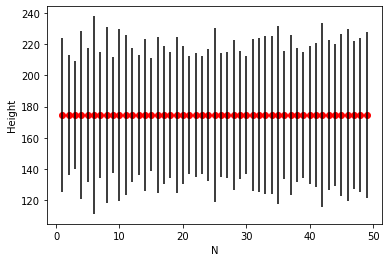

In [306]:
parameters = []
for i in range(1,50):

    height_sample = 'mu_vect['+ str(i)+']'
    data = fit_pd[height_sample]
    plt.scatter(i, np.mean(data), color='r')
    plt.errorbar(i, np.mean(data), np.std(data), color='k')
plt.xlabel("N")
plt.ylabel("Height")
plt.show()

## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of 
 in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the model block.